In [6]:
#import libraries


import os
import pandas as pd
import hvplot
import hvplot.pandas 
import matplotlib
import requests
import numpy as np
from datetime import datetime
from itertools import islice
import json
from pathlib import Path
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import yfinance as yf

In [2]:
# Read the META.csv file from the Resources folder into a Pandas DataFrame
# Set the `Date` column as the DateTimeIndex
META_df = pd.read_csv(
    Path("../Resources/META.csv"), 
    index_col="Date",
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the DataFrame
display(META_df.head())
display(META_df.tail())

C:\Users\quaku\AppData\Local\Temp\ipykernel_8032\3827751842.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  META_df = pd.read_csv(


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-19,141.210007,144.910004,132.500000,133.240005,133.240005,57404900
2018-12-20,130.699997,135.570007,130.000000,133.399994,133.399994,40297900
2018-12-21,133.389999,134.899994,123.419998,124.949997,124.949997,56901500
2018-12-24,123.099998,129.740005,123.019997,124.059998,124.059998,22066000
2018-12-26,126.000000,134.240005,125.889999,134.179993,134.179993,39723400


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-12,324.600006,334.470001,324.559998,334.220001,334.220001,18485500
2023-12-13,333.929993,338.369995,332.640015,334.739990,334.739990,16353300
2023-12-14,333.850006,334.700012,328.640015,333.170013,333.170013,19607300
2023-12-15,331.989990,338.660004,331.220001,334.920013,334.920013,30001600
2023-12-18,337.480011,347.559998,337.019989,344.619995,344.619995,18993900


In [3]:
# Read the TSLA.csv file from the Resources folder into a Pandas DataFrame
# Set the `Date` column as the DateTimeIndex
TSLA_df = pd.read_csv(
    Path("../Resources/TSLA.csv"), 
    index_col="Date",
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the DataFrame
display(TSLA_df.head())
display(TSLA_df.tail())

C:\Users\quaku\AppData\Local\Temp\ipykernel_8032\3827772090.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  TSLA_df = pd.read_csv(


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-20,21.803333,22.019333,20.791332,21.025333,21.025333,136078500
2018-12-21,21.160000,21.564667,20.829332,21.318001,21.318001,120252000
2018-12-24,20.900000,20.966667,19.680000,19.692667,19.692667,83398500
2018-12-26,20.000000,21.798000,19.606001,21.739332,21.739332,122446500
2018-12-27,21.322666,21.478001,20.100000,21.075333,21.075333,128626500


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-12,238.550003,238.990005,233.869995,237.009995,237.009995,95328300
2023-12-13,234.190002,240.300003,228.199997,239.289993,239.289993,146286300
2023-12-14,241.220001,253.880005,240.789993,251.050003,251.050003,160829200
2023-12-15,251.210007,254.130005,248.300003,253.500000,253.500000,135720800
2023-12-18,253.779999,258.739990,251.360001,252.080002,252.080002,116416500


In [4]:
# clean up datafram by removing Adj Close column
# Drop columns which aren't needed(Adj Close) and display the results

META_data = META_df.drop(columns=['Adj Close'])
META_data_plot = META_data.reset_index()


META_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-19,141.210007,144.910004,132.500000,133.240005,57404900
2018-12-20,130.699997,135.570007,130.000000,133.399994,40297900
2018-12-21,133.389999,134.899994,123.419998,124.949997,56901500
2018-12-24,123.099998,129.740005,123.019997,124.059998,22066000
2018-12-26,126.000000,134.240005,125.889999,134.179993,39723400


In [5]:
# clean up datafram by removing Adj Close column
# Drop columns which aren't needed(Adj Close) and display the results

TSLA_data = TSLA_df.drop(columns=['Adj Close'])
TSLA_data_plot = TSLA_data.reset_index()


TSLA_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-20,21.803333,22.019333,20.791332,21.025333,136078500
2018-12-21,21.160000,21.564667,20.829332,21.318001,120252000
2018-12-24,20.900000,20.966667,19.680000,19.692667,83398500
2018-12-26,20.000000,21.798000,19.606001,21.739332,122446500
2018-12-27,21.322666,21.478001,20.100000,21.075333,128626500


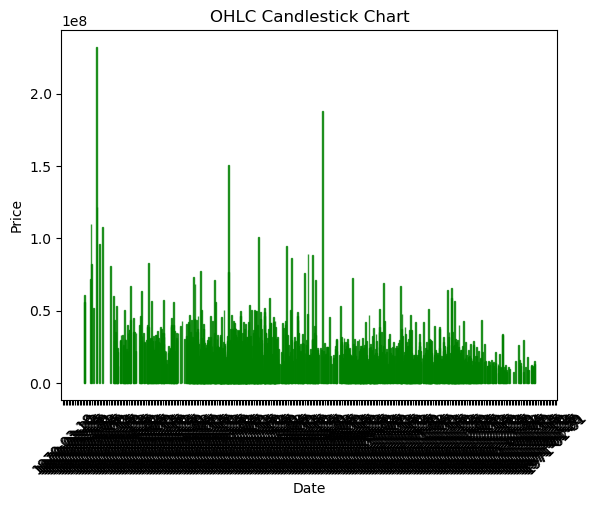

In [11]:
# Create a figure and axis
fig, ax = plt.subplots()
candlestick_ohlc(ax, META_data.values, width=0.6, colorup='g', colordown='r', alpha=0.8)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())


plt.xticks(rotation=45)
plt.title('OHLC Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()